In [281]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [282]:
intermediate_dir = "../00_data/02_intermediate/"

In [283]:
df = pd.read_csv(f"{intermediate_dir}20250602agg_all.csv")
#df = df.drop(columns=["physical_access", "adult_sti", "adult_excessive_drinking"])

In [284]:
df.columns[::-1]

Index(['noise90n', 'noise80n', 'noise70n', 'Weighted_RESP', 'Park_Area_Acres',
       'gdp', 'Sample_Size', 'Data_value', 'v045_rawvalue', 'v067_numerator',
       'v063_rawvalue', 'v062_numerator', 'v082_numerator', 'v023_numerator',
       'v069_numerator', 'v070_numerator', 'v060_rawvalue', 'v049_rawvalue',
       'v011_rawvalue', 'v009_rawvalue', 'v052_rawvalue', 'v051_rawvalue',
       'cbsacode', 'Year'],
      dtype='object')

In [285]:
rename_dict = {
    'v009_rawvalue': 'adult_smoking',
    'v011_rawvalue': 'adult_obesity',
    'v045_rawvalue': 'sti',
    'v049_rawvalue': 'excessive_drinking',
    'v051_rawvalue': 'population',
    'v052_rawvalue': 'under_18_pct',
    'v060_rawvalue': 'diabetes_prevalence',
    'v070_numerator': 'no_time_activity',
    'v069_numerator': 'some_college',
    'v023_numerator': 'unemployment',
    'v082_numerator': 'children_single_parent',
    'v062_numerator': 'mental_health_providers',
    'v063_rawvalue': 'median_household_income',
    'v067_numerator': 'driving_alone_to_work'
}

df = df.rename(columns=rename_dict)


In [286]:
df

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541


In [287]:
    # 'v009', # adult smoking #--
    # 'v011', # adult obesity #--
    # 'v045', # sti #--xx
    # 'v049', # excessive drinking #--xx
    # 'v051', # pop raw #
    # 'v052', # Percentage of population below 18 years of age. #
    # 'v060',  # diabetes prevalence #--
    # #'v132' # Percentage of population with adequate access to locations for physical activity #
    # 'v070', #--xx Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).
    # 'v069', # some college
    # 'v023', # unemployment
    # 'v082', # children in single-parent households
    # 'v062', # mental health providers
    # 'v063', # median household income
    # 'v067'#, # driving alone to work

In [288]:
df.columns

Index(['Year', 'cbsacode', 'population', 'under_18_pct', 'adult_smoking',
       'adult_obesity', 'excessive_drinking', 'diabetes_prevalence',
       'no_time_activity', 'some_college', 'unemployment',
       'children_single_parent', 'mental_health_providers',
       'median_household_income', 'driving_alone_to_work', 'sti', 'Data_value',
       'Sample_Size', 'gdp', 'Park_Area_Acres', 'Weighted_RESP', 'noise70n',
       'noise80n', 'noise90n'],
      dtype='object')

In [289]:
# print(df[df.columns[2:]].isna().sum())  # Check NaN counts
# print(np.isinf(df[df.columns[2:]]).sum())  # Check Inf counts
df[df.columns[5:]] = df[df.columns[5:]].replace([np.inf, -np.inf], np.nan)

# Drop rows where any of the selected columns contain NaN
# df = df.dropna(subset=df.columns[5:])
#print(np.isinf(df[df.columns[2:]]).sum()) 
df[df.columns[5:]]

,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n
0,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390
1,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390
2,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337
3,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337
4,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898
230,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980
231,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980
232,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541


## pca

In [290]:
df.columns

Index(['Year', 'cbsacode', 'population', 'under_18_pct', 'adult_smoking',
       'adult_obesity', 'excessive_drinking', 'diabetes_prevalence',
       'no_time_activity', 'some_college', 'unemployment',
       'children_single_parent', 'mental_health_providers',
       'median_household_income', 'driving_alone_to_work', 'sti', 'Data_value',
       'Sample_Size', 'gdp', 'Park_Area_Acres', 'Weighted_RESP', 'noise70n',
       'noise80n', 'noise90n'],
      dtype='object')

In [291]:
# 'v009', # adult smoking #--
# 'v011', # adult obesity #--
# 'v060',  # diabetes prevalence #--

In [292]:
numeric_cols1 = ['adult_smoking', 'adult_obesity', 'diabetes_prevalence']
col_keep = [i for i in df.columns]# if i not in numeric_cols1]


scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(df[numeric_cols1]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled1)
pca1 = PCA(n_components=1)#
principal_component1 = pca1.fit_transform(df_scaled1)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.51% of the variance.


In [293]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


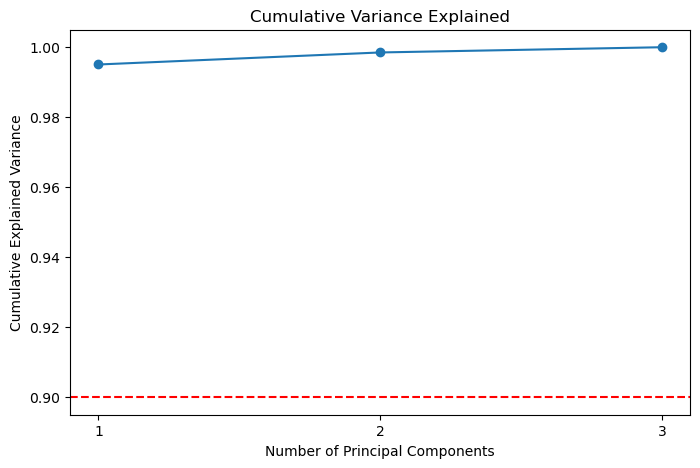

In [294]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [295]:
df_pca_1 = pca.transform(df_scaled1)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_1, np.zeros((df_pca_1.shape[0], df_scaled1.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled1 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0049


In [296]:
type(col_keep)

list

In [297]:
col_keep

['Year',
 'cbsacode',
 'population',
 'under_18_pct',
 'adult_smoking',
 'adult_obesity',
 'excessive_drinking',
 'diabetes_prevalence',
 'no_time_activity',
 'some_college',
 'unemployment',
 'children_single_parent',
 'mental_health_providers',
 'median_household_income',
 'driving_alone_to_work',
 'sti',
 'Data_value',
 'Sample_Size',
 'gdp',
 'Park_Area_Acres',
 'Weighted_RESP',
 'noise70n',
 'noise80n',
 'noise90n']

In [298]:
df_pca1 = pd.DataFrame(principal_component1, columns=['smo_obe_dia'])

df_final = pd.concat([df[col_keep], df_pca1], axis=1)
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545


In [299]:
df_final.smo_obe_dia.max(),df_final.smo_obe_dia.min()

(11.362653439925177, -1.0752261607680798)

In [300]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545


## 2 factors: smoking + obesity

In [301]:
numeric_cols2 = ['adult_smoking', 'adult_obesity']

scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df[numeric_cols2]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 2
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled2)
pca2 = PCA(n_components=1)#
principal_component2 = pca2.fit_transform(df_scaled2)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.59% of the variance.


In [302]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


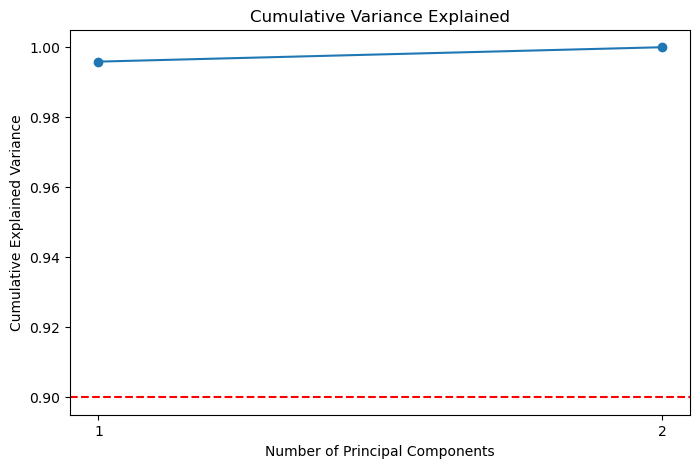

In [303]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [304]:
df_pca_2 = pca.transform(df_scaled2)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_2, np.zeros((df_pca_2.shape[0], df_scaled2.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled2 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0041


In [305]:
df_pca2 = pd.DataFrame(principal_component2, columns=['smo_obe'])

df_final = pd.concat([df_final, df_pca2], axis=1)
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240


In [306]:
df_final.smo_obe.max(),df_final.smo_obe.min()

(9.110666475709893, -0.8954290447182872)

In [307]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240


## 2 factors: smoking + diabetes

In [308]:
numeric_cols3 = ['adult_smoking', 'diabetes_prevalence']

scaler = StandardScaler()
df_scaled3 = scaler.fit_transform(df[numeric_cols3]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled3)
pca3 = PCA(n_components=1)#
principal_component3 = pca3.fit_transform(df_scaled3)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.53% of the variance.


In [309]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


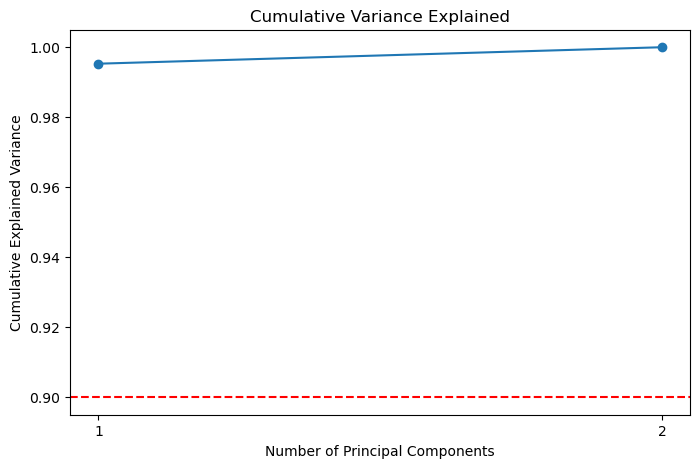

In [310]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()

In [311]:
df_pca_3 = pca.transform(df_scaled3)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_3, np.zeros((df_pca_3.shape[0], df_scaled3.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled3 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0047


In [312]:
df_pca3 = pd.DataFrame(principal_component3, columns=['smo_dia'])

df_final = pd.concat([df_final, df_pca3], axis=1)
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930,-0.309355
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763,-0.338405
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208,-0.272002
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438,-0.331791
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205,-0.782972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217,-0.443906
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706,-0.181341
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528,-0.174048
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240,-0.633808


In [313]:
df_final.smo_dia.max(),df_final.smo_dia.min()

(9.482836313914506, -0.872976773623423)

In [314]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930,-0.309355
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763,-0.338405
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208,-0.272002
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438,-0.331791
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205,-0.782972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217,-0.443906
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706,-0.181341
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528,-0.174048
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240,-0.633808


## 2 factors: obesity + diabetes

In [315]:
numeric_cols4 = ['adult_obesity', 'diabetes_prevalence']

scaler = StandardScaler()
df_scaled4 = scaler.fit_transform(df[numeric_cols4]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled4)
pca4 = PCA(n_components=1)#
principal_component4 = pca4.fit_transform(df_scaled4)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.77% of the variance.


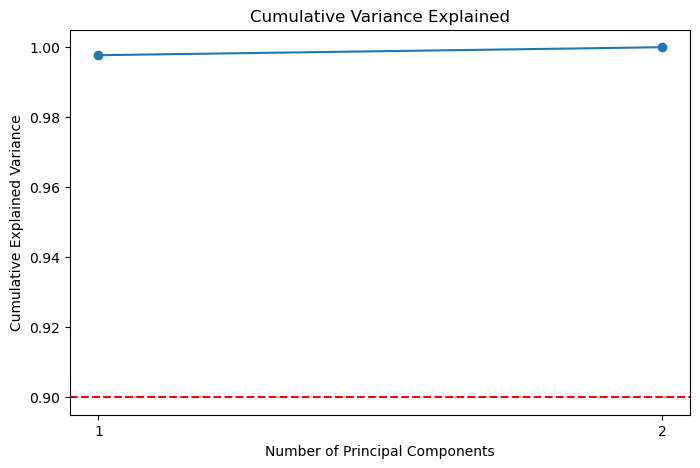

In [316]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [317]:
df_pca_4 = pca.transform(df_scaled4)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_4, np.zeros((df_pca_4.shape[0], df_scaled4.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled4 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0023


In [318]:
df_pca4 = pd.DataFrame(principal_component4, columns=['obe_dia'])

df_final = pd.concat([df_final, df_pca4], axis=1)
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia,obe_dia
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930,-0.309355,-0.348176
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763,-0.338405,-0.344245
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208,-0.272002,-0.359075
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438,-0.331791,-0.398564
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205,-0.782972,-0.785589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217,-0.443906,-0.442079
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706,-0.181341,-0.244855
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528,-0.174048,-0.213803
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240,-0.633808,-0.642733


In [319]:
df_final.obe_dia.max(),df_final.obe_dia.min()

(9.239464139946218, -0.8653772321233031)

In [320]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Data_value,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia,obe_dia
0,2011,10420.0,542405.0,123668.340,93797.011840,117246.264800,74535.125480,44804.822620,0.0,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,16.600000,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930,-0.309355,-0.348176
1,2012,10420.0,542405.0,123668.340,86259.751960,121433.631400,73697.652160,43967.349300,0.0,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,20.180000,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763,-0.338405,-0.344245
2,2011,10740.0,841428.0,207848.321,119645.415194,132813.285121,83828.102769,37536.718343,0.0,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,21.295516,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208,-0.272002,-0.359075
3,2012,10740.0,768515.0,188890.941,104113.349277,119447.357021,73239.331013,35823.223199,0.0,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,21.340000,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438,-0.331791,-0.398564
4,2011,10900.0,109638.0,25655.292,18056.282220,23095.244700,13353.250572,6802.599348,0.0,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,11.850000,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205,-0.782972,-0.785589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,133024.144,72999.330624,105562.757520,50813.259552,33636.946464,0.0,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,16.370000,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217,-0.443906,-0.442079
230,2011,49340.0,803701.0,189673.436,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,17.340000,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706,-0.181341,-0.244855
231,2012,49340.0,803701.0,189673.436,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,19.090000,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528,-0.174048,-0.213803
232,2011,49660.0,236735.0,51371.495,39853.153575,52087.144905,29287.433790,19833.895035,0.0,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,16.120000,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240,-0.633808,-0.642733


In [321]:
df_final['depressed'] = df_final['Data_value'] *  df_final['population'] / 100
df_final = df_final.drop(columns=['under_18_pct','Data_value','no_time_activity']).copy()

## Physical Inactivity miss data 2011 2012 2013 and 2022
- use 2014 data for 2011-2013
- 2021 data for 2022
## Mental Health Provider missing data 2014,
- use avg(2015,2016)

In [322]:
# check = df_final.loc[df_final['no_time_activity']==0]
# check['Year'].unique()

In [323]:
chr

,fipscode,cbsacode,county,countycode,state,statecode,year,v051_rawvalue,v052_rawvalue,statecode.1,countycode.1,fipscode.1,state.1,county.1,year.1,v009_rawvalue,v011_rawvalue,v049_rawvalue,v060_rawvalue,v070_numerator,v069_numerator,v023_numerator,v082_numerator,v062_numerator,v063_rawvalue,v067_numerator,v045_rawvalue
0,1001,33860,Autauga County,1,AL,1,2011.0,50756.0,14110.168000,1,1,1001.0,AL,Autauga County,2011.0,10040.957968,11543.437080,5167.062312,4177.624848,NaN,7660.0,2143.0,4119.0,1.0,51622.0,19529.0,307.8
1,1001,33860,Autauga County,1,AL,1,2012.0,50756.0,14110.168000,1,1,1001.0,AL,Autauga County,2012.0,9014.874672,12496.228712,5826.687288,4507.437336,NaN,7941.0,1933.0,4338.0,1.0,53049.0,21279.0,424.9
2,1001,33860,Autauga County,1,AL,1,2013.0,55267.0,14388.000003,1,1,1001.0,AL,Autauga County,2013.0,9606.564999,13939.738999,6745.035000,5028.117000,NaN,7990.0,2076.0,3872.0,2.0,48863.0,21262.0,362.8
3,1001,33860,Autauga County,1,AL,1,2014.0,55514.0,14409.000000,1,1,1001.0,AL,Autauga County,2014.0,8919.785000,12537.025000,6864.535000,4850.390000,11310.0,7940.0,1644.0,4388.0,NaN,51441.0,21393.0,446.9
4,1001,33860,Autauga County,1,AL,1,2015.0,55246.0,14028.999999,1,1,1001.0,AL,Autauga County,2015.0,8944.089000,12900.921000,6883.239000,4987.257000,10974.0,8145.0,1449.0,4229.0,7.0,51868.0,21372.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22015,56041,21740,Uinta County,41,WY,56,2018.0,20773.0,6098.000001,56,41,56041.0,WY,Uinta County,2018.0,2668.001012,4725.350000,2356.593546,1467.500000,3508.0,3102.0,546.0,1352.0,71.0,64713.0,7049.0,310.9
22016,56041,21740,Uinta County,41,WY,56,2019.0,20495.0,5987.000001,56,41,56041.0,WY,Uinta County,2019.0,2637.639433,4613.544000,2329.775753,1349.244000,3331.0,2955.0,411.0,1310.0,70.0,67404.0,7262.0,288.2
22017,56041,21740,Uinta County,41,WY,56,2020.0,20299.0,5844.000011,56,41,56041.0,WY,Uinta County,2020.0,2488.092112,5174.889996,2762.835781,1633.414999,3841.0,2964.0,390.0,1043.0,72.0,63401.0,7247.0,151.3
22018,56041,21740,Uinta County,41,WY,56,2021.0,20226.0,5752.000000,56,41,56041.0,WY,Uinta County,2021.0,3005.455190,5094.848000,2664.273669,1490.822000,3519.0,2821.0,353.0,602.0,72.0,70756.0,6946.0,204.9


In [324]:
chr

,fipscode,cbsacode,county,countycode,state,statecode,year,v051_rawvalue,v052_rawvalue,statecode.1,countycode.1,fipscode.1,state.1,county.1,year.1,v009_rawvalue,v011_rawvalue,v049_rawvalue,v060_rawvalue,v070_numerator,v069_numerator,v023_numerator,v082_numerator,v062_numerator,v063_rawvalue,v067_numerator,v045_rawvalue
0,1001,33860,Autauga County,1,AL,1,2011.0,50756.0,14110.168000,1,1,1001.0,AL,Autauga County,2011.0,10040.957968,11543.437080,5167.062312,4177.624848,NaN,7660.0,2143.0,4119.0,1.0,51622.0,19529.0,307.8
1,1001,33860,Autauga County,1,AL,1,2012.0,50756.0,14110.168000,1,1,1001.0,AL,Autauga County,2012.0,9014.874672,12496.228712,5826.687288,4507.437336,NaN,7941.0,1933.0,4338.0,1.0,53049.0,21279.0,424.9
2,1001,33860,Autauga County,1,AL,1,2013.0,55267.0,14388.000003,1,1,1001.0,AL,Autauga County,2013.0,9606.564999,13939.738999,6745.035000,5028.117000,NaN,7990.0,2076.0,3872.0,2.0,48863.0,21262.0,362.8
3,1001,33860,Autauga County,1,AL,1,2014.0,55514.0,14409.000000,1,1,1001.0,AL,Autauga County,2014.0,8919.785000,12537.025000,6864.535000,4850.390000,11310.0,7940.0,1644.0,4388.0,NaN,51441.0,21393.0,446.9
4,1001,33860,Autauga County,1,AL,1,2015.0,55246.0,14028.999999,1,1,1001.0,AL,Autauga County,2015.0,8944.089000,12900.921000,6883.239000,4987.257000,10974.0,8145.0,1449.0,4229.0,7.0,51868.0,21372.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22015,56041,21740,Uinta County,41,WY,56,2018.0,20773.0,6098.000001,56,41,56041.0,WY,Uinta County,2018.0,2668.001012,4725.350000,2356.593546,1467.500000,3508.0,3102.0,546.0,1352.0,71.0,64713.0,7049.0,310.9
22016,56041,21740,Uinta County,41,WY,56,2019.0,20495.0,5987.000001,56,41,56041.0,WY,Uinta County,2019.0,2637.639433,4613.544000,2329.775753,1349.244000,3331.0,2955.0,411.0,1310.0,70.0,67404.0,7262.0,288.2
22017,56041,21740,Uinta County,41,WY,56,2020.0,20299.0,5844.000011,56,41,56041.0,WY,Uinta County,2020.0,2488.092112,5174.889996,2762.835781,1633.414999,3841.0,2964.0,390.0,1043.0,72.0,63401.0,7247.0,151.3
22018,56041,21740,Uinta County,41,WY,56,2021.0,20226.0,5752.000000,56,41,56041.0,WY,Uinta County,2021.0,3005.455190,5094.848000,2664.273669,1490.822000,3519.0,2821.0,353.0,602.0,72.0,70756.0,6946.0,204.9


In [325]:
chr

,fipscode,cbsacode,county,countycode,state,statecode,year,v051_rawvalue,v052_rawvalue,statecode.1,countycode.1,fipscode.1,state.1,county.1,year.1,v009_rawvalue,v011_rawvalue,v049_rawvalue,v060_rawvalue,v070_numerator,v069_numerator,v023_numerator,v082_numerator,v062_numerator,v063_rawvalue,v067_numerator,v045_rawvalue
0,1001,33860,Autauga County,1,AL,1,2011.0,50756.0,14110.168000,1,1,1001.0,AL,Autauga County,2011.0,10040.957968,11543.437080,5167.062312,4177.624848,NaN,7660.0,2143.0,4119.0,1.0,51622.0,19529.0,307.8
1,1001,33860,Autauga County,1,AL,1,2012.0,50756.0,14110.168000,1,1,1001.0,AL,Autauga County,2012.0,9014.874672,12496.228712,5826.687288,4507.437336,NaN,7941.0,1933.0,4338.0,1.0,53049.0,21279.0,424.9
2,1001,33860,Autauga County,1,AL,1,2013.0,55267.0,14388.000003,1,1,1001.0,AL,Autauga County,2013.0,9606.564999,13939.738999,6745.035000,5028.117000,NaN,7990.0,2076.0,3872.0,2.0,48863.0,21262.0,362.8
3,1001,33860,Autauga County,1,AL,1,2014.0,55514.0,14409.000000,1,1,1001.0,AL,Autauga County,2014.0,8919.785000,12537.025000,6864.535000,4850.390000,11310.0,7940.0,1644.0,4388.0,NaN,51441.0,21393.0,446.9
4,1001,33860,Autauga County,1,AL,1,2015.0,55246.0,14028.999999,1,1,1001.0,AL,Autauga County,2015.0,8944.089000,12900.921000,6883.239000,4987.257000,10974.0,8145.0,1449.0,4229.0,7.0,51868.0,21372.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22015,56041,21740,Uinta County,41,WY,56,2018.0,20773.0,6098.000001,56,41,56041.0,WY,Uinta County,2018.0,2668.001012,4725.350000,2356.593546,1467.500000,3508.0,3102.0,546.0,1352.0,71.0,64713.0,7049.0,310.9
22016,56041,21740,Uinta County,41,WY,56,2019.0,20495.0,5987.000001,56,41,56041.0,WY,Uinta County,2019.0,2637.639433,4613.544000,2329.775753,1349.244000,3331.0,2955.0,411.0,1310.0,70.0,67404.0,7262.0,288.2
22017,56041,21740,Uinta County,41,WY,56,2020.0,20299.0,5844.000011,56,41,56041.0,WY,Uinta County,2020.0,2488.092112,5174.889996,2762.835781,1633.414999,3841.0,2964.0,390.0,1043.0,72.0,63401.0,7247.0,151.3
22018,56041,21740,Uinta County,41,WY,56,2021.0,20226.0,5752.000000,56,41,56041.0,WY,Uinta County,2021.0,3005.455190,5094.848000,2664.273669,1490.822000,3519.0,2821.0,353.0,602.0,72.0,70756.0,6946.0,204.9


In [335]:
chr = pd.read_csv('../00_data/02_intermediate/chr_cbsa.csv')
no_time = chr[['v070_numerator','cbsacode']].loc[chr['year']==2014].groupby('cbsacode').sum().reset_index()

In [336]:
no_time

,cbsacode,v070_numerator
0,10100,8259.0
1,10140,13580.0
2,10180,34899.0
3,10220,9816.0
4,10300,17714.0
...,...,...
913,49660,98261.0
914,49700,24758.0
915,49740,33884.0
916,49780,21406.0


In [337]:
df_final = df_final.merge(no_time)
df_final = df_final.rename(columns=rename_dict)

In [338]:
df_final

,Year,cbsacode,population,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,Sample_Size,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia,obe_dia,depressed,no_time_activity
0,2011,10420.0,542405.0,93797.011840,117246.264800,74535.125480,44804.822620,94515.0,29077.0,41007.0,375.0,49528.0,223355.0,364.6,112.0,30090713.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.413356,-0.354930,-0.309355,-0.348176,90039.230000,130185.0
1,2012,10420.0,542405.0,86259.751960,121433.631400,73697.652160,43967.349300,90784.0,28913.0,40388.0,375.0,45768.0,221759.0,368.3,118.0,31046119.0,41598.151360,0.216675,5494.820512,537.544918,53.114390,-0.429643,-0.369763,-0.338405,-0.344245,109457.329000,130185.0
2,2011,10740.0,841428.0,119645.415194,132813.285121,83828.102769,37536.718343,142157.0,29683.0,72115.0,174.0,146437.0,298296.0,1024.7,698.0,37141102.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.355368,-0.239208,-0.272002,-0.359075,179186.432343,117481.0
3,2012,10740.0,768515.0,104113.349277,119447.357021,73239.331013,35823.223199,131916.0,31877.0,68841.0,171.0,100183.0,285827.0,878.4,609.0,37226565.0,36984.815680,0.145476,5540.745134,1224.879163,17.445337,-0.427815,-0.317438,-0.331791,-0.398564,164001.101000,117481.0
4,2011,10900.0,109638.0,18056.282220,23095.244700,13353.250572,6802.599348,18230.0,5300.0,6087.0,20.0,74721.0,43437.0,90.1,75.0,36883410.0,104714.633800,0.239067,6179.837741,694.010695,86.917561,-0.966635,-0.799205,-0.782972,-0.785589,12992.103000,157927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2012,48620.0,490864.0,72999.330624,105562.757520,50813.259552,33636.946464,81464.0,21981.0,43564.0,56.0,45996.0,196327.0,558.5,300.0,28623784.0,10427.746640,0.313956,5302.334212,361.131273,60.846898,-0.543867,-0.446217,-0.443906,-0.442079,80354.436800,110132.0
230,2011,49340.0,803701.0,123419.540364,149208.698052,122191.485236,50350.260248,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,468.0,36014006.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.252304,-0.191706,-0.181341,-0.244855,139361.753400,137149.0
231,2012,49340.0,803701.0,120963.430108,156577.028820,123419.540364,52806.370504,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,549.0,37033118.0,52331.852940,0.206128,6650.566990,1171.716480,28.399980,-0.233294,-0.183528,-0.174048,-0.213803,153426.520900,137149.0
232,2011,49660.0,236735.0,39853.153575,52087.144905,29287.433790,19833.895035,31633.0,14448.0,20784.0,63.0,40508.0,89013.0,376.9,110.0,15781356.0,5621.076757,0.203079,1981.787831,130.858132,15.124541,-0.793545,-0.667240,-0.633808,-0.642733,38161.682000,98261.0


In [ ]:


# # Example: your dataframe
# # df = pd.read_csv('your_data.csv')

# # Fill Physical Inactivity for 2011–2013 using 2014 values
# for year in ['2011', '2012', '2013']:
#     df_final.loc[df_final['Year'] == int(year), 'no_time_activity'] = (
#         df_final.loc[df_final['Year'] == 2014, 'no_time_activity'].values
#     )

# # Fill Physical Inactivity for 2022 using 2021 values
# df_final.loc[df_final['Year'] == 2022, 'no_time_activity'] = (
#     df_final.loc[df_final['Year'] == 2021, 'no_time_activity'].values
# )

# # Fill Mental Health Provider for 2014 using the average of 2015 and 2016
# df_final.loc[df_final['Year'] == 2014, 'mental_health_providers'] = (
#     df_final.loc[df_final['Year'] == 2015, 'mental_health_providers'].values +
#     df_final.loc[df_final['Year'] == 2016, 'mental_health_providers'].values
# ) / 2

In [340]:
df_final.sort_values(by=['Year', 'cbsacode'], ascending=True).to_csv(f"../00_data/03_analysis_data/20250602_all_factor_72_12.csv", index=False)